In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE,SMOTENC

#Importing the ML algorithms
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing accuracy metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Setting the options to show all columns 
pd.set_option('display.max_columns', None)

In [3]:
#Reading the data
df=pd.read_csv(r".\Raw Data\diabetic_data_UCI.csv")

In [4]:
df1=df.copy()

In [5]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df1.gender.unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

* The target column is readmitted
* The Missing values in the dataset are denoted by "?"
* Gender Column has 'Unknown/Invalid' Categories present which needs to be processed

In [7]:
#Checking the datatypes of the column
df1.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

* We can see that most of the columns are object/categorical which will require encoding to be used for modelling
* The Nulls need to be processed before generating visualisations

In [8]:
#Replacing the "?" with nan 
df_n=df1.replace("?",np.nan)

#CHecking the columns with more than 30% NULL values present 
(df_n.isna().sum()*100/len(df_n))[(df_n.isna().sum()*100/len(df_n))>30]

weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
dtype: float64

* The column weight has more than 96% NUll values which means it'smostly empty
* Dropping all three columns 

In [9]:
# Dropping the columns weight , payer_code,med_speciality 
df_w=df_n.drop(['weight','payer_code','medical_specialty'],axis=1)

In [10]:
df_w=df_w.replace("Unknown/Invalid",np.nan)

In [11]:
# CHecking the percentag of Null values present by each column without any threshold
(df_w.isna().sum()*100/len(df_w))[(df_w.isna().sum()*100/len(df_w))>0]

race      2.233555
gender    0.002948
diag_1    0.020636
diag_2    0.351787
diag_3    1.398306
dtype: float64

* Observing that the columns have utmost 3% data missing in them , we have two options imputation or dropping the variables

In [12]:
#CHecking the percentage of rows lost if we drop them from the dataset 
(df_w.shape[0]-df_w.dropna(axis=0).shape[0])*100/df_w.dropna(axis=0).shape[0]

3.7877860726961203

* The context of the variables being medical in nature , It is not recommended to impute the data in missing values
* Since the loss of data is  3.8% , the missing rows can be dropped without loosing too much information 

In [13]:
# Dropping the rows with NA values in the dataset
df_w.dropna(axis=0,inplace=True)

In [14]:
# Assinging the dataframe to a different variable
df_ms=df_w.copy()

In [15]:
df_ms.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

* Hence we can see there are no more NULL values present in the dataset

In [16]:
# Checking the distribution of the categorical variables
df_ms['citoglipton'].value_counts()

No    98052
Name: citoglipton, dtype: int64

In [17]:
# Checking the distribution of the categorical variables
df_ms['examide'].value_counts()

No    98052
Name: examide, dtype: int64

* The variables above contain only one category hence dosen't add much value while predicting the response variable,hence dropping the variables is apt

In [18]:
# dropping the variable
df_ms.drop(['citoglipton', 'examide'],axis=1,inplace=True)

In [19]:
df_ms.to_csv('.\Processed Data\Data_Null.csv',index=False)

* From the data dictionary, The features admission type , discharge disposition, admission source have categories that are similar in nature , hence combining the categories to reduce the number of columns generated when we encode the variable

* For admission_type the categories which are similar and the category they are mapped to are as follows
 * 2-Urgent, 7- Trauma Center can be mapped to 1-Emergency
 * 6-NULL,8 - Not Mapped mapped to 5 - Not available 
 

In [20]:
# using replace to combine the categories
df_ms['admission_type_id']=df_ms['admission_type_id'].replace({2:1,7:1,6:5,8:5})  

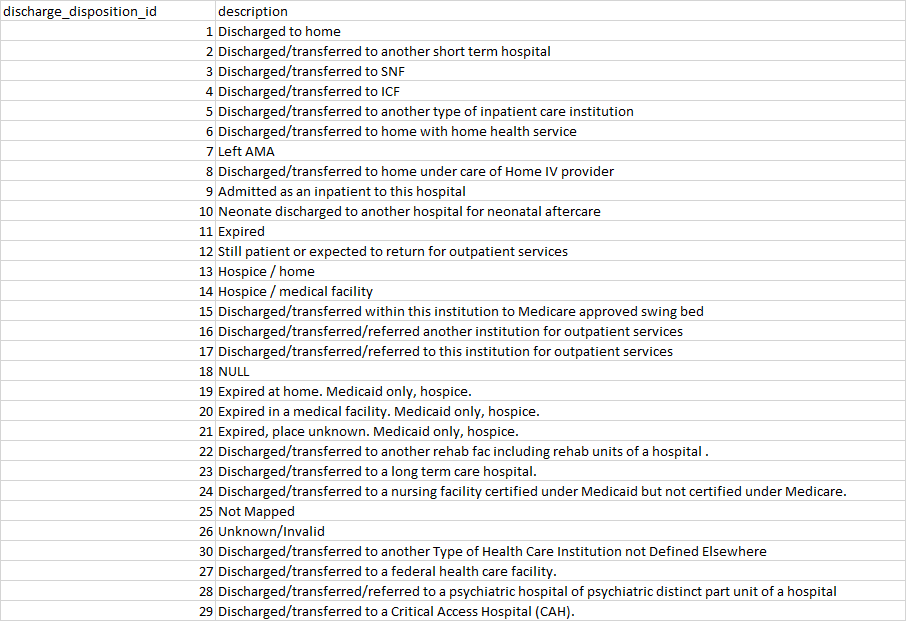
* we can see the similar categories and combine them together

In [21]:
# using replace to combine the categories
df_ms['discharge_disposition_id']=df_ms['discharge_disposition_id'].replace({6:1,8:1,9:5,13:1,3:2,4:2,5:2,14:2,22:2,23:2,24:2,12:10,15:10,16:10,17:10,25:18,26:18})


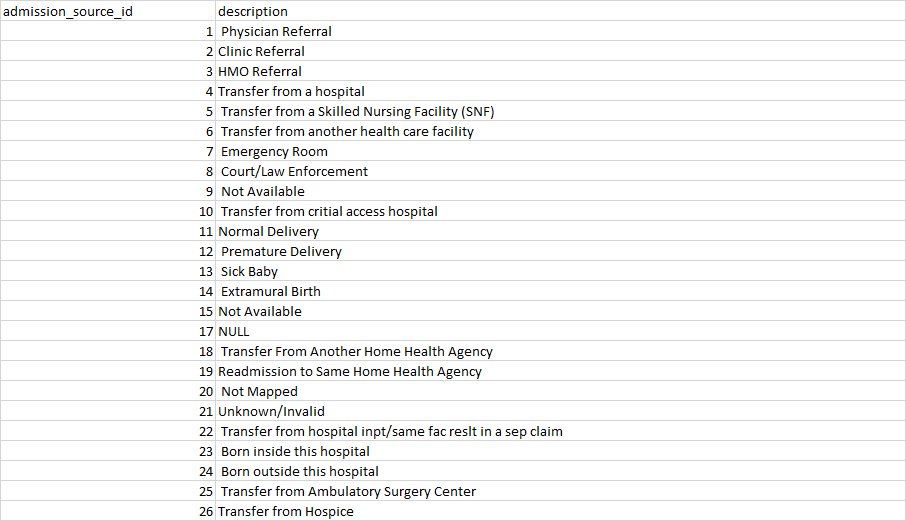

In [22]:
# using replace to combine the categories
df_ms['admission_source_id']=df_ms['admission_source_id'].replace({2:1,3:1,5:4,6:4,10:4,22:4,25:4,15:9,17:9,20:9,21:9,13:11,14:11})

### Encoding the categorical variables

In [23]:
# using replace to combine the categories and encode it to Numerical values
df_ms['change']=df_ms['change'].replace({'Ch':1,'No':0})
df_ms['gender']=df_ms['gender'].replace({'Male':1,'Female':0})
df_ms['diabetesMed']=df_ms['diabetesMed'].replace({'Yes':1,'No':0})

In [24]:
# using replace to combine the categories
medicine_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [25]:
# using replace to combine the categories
df_ms[medicine_columns]=df_ms[medicine_columns].replace({'No':0,'Steady':1,'Up':1,'Down':1})

### Replacing the variables in test result columns such A1cresult and max_glu_serum where None is punished with a negative variable

In [26]:
# using replace to combine the categories
df_ms['A1Cresult']=df_ms['A1Cresult'].replace({'>7':1,'>8':1,'Norm':0,'None':-100})
df_ms['max_glu_serum']=df_ms['max_glu_serum'].replace({'>200':1,'>300':1,'Norm':0,'None':-100})

In [27]:
# using replace to combine the categories
df_ms.age.value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [28]:
# using replacethe age value with mid point values
df_ms['age']=df_ms['age'].replace({'[0-10)':5,'[10-20)':15,'[20-30)':25,'[30-40)':35,'[40-50)':45,'[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,'[90-100)':95})

In [29]:
# Encoding the Target Variable 
df_ms['readmitted']=df_ms['readmitted'].replace({'>30':0,'<30':1,'NO':0})

* Encoding the target variable with 3 categories to two as only <30(less than 30 days before readmission) is being considered as readmitted and both >30,NO are being considered as not readmitted 

### Preprocessing the diagnosis variable into clubbed categories as each of them belongs to a speific diagnosis field, This reduces the number of variables generated

In [30]:
def diag_div(x):
    # ASsigning the diagnosis to categories based on the diagnosis classification
    if(("V" in str(x)) or ("E" in str(x))):
        return "Other"
    elif("250" in str(x)):
        return "Diabetes"
    elif((((int(x))>=390) and ((int(x))<=459)) or int(x)==785 ):
        return "Circulatory"
    elif((((int(x))>=460) and ((int(x))<=519)) or int(x)==786 ):
        return "Respiratory"
    elif((((int(x))>=520) and ((int(x))<=579)) or int(x)==787 ):
        return "Digestive"
    elif((((int(x))>=580) and ((int(x))<=629)) or int(x)==788 ):
        return "Genitourinary"    
    elif((((int(x))>=140) and ((int(x))<=239))):
        return "Neoplasms"
    elif((((int(x))>=710) and ((int(x))<=739))):    
        return "Musculoskeletal"
    elif((((int(x))>=800) and ((int(x))<=999))):
        return "Injury"
    else:
        return "Other"

In [31]:
df_ms['diag_cat']=df_ms['diag_1'].apply(diag_div)
df_d=df_ms.drop(['diag_2','diag_3'],axis=1)

### One hot Encoding the variables

In [32]:
# Using get dummies to generate encoded columns for each category in the features present
df_catf = pd.get_dummies(df_d, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'diag_cat'], drop_first = True)

In [33]:
r_var = pd.get_dummies(df_catf['race'])
df_catf = pd.concat([df_catf, r_var], axis=1)
df_catf.drop(['race'], inplace=True, axis=1)

In [34]:
df_catf.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,gender_1,admission_type_id_3,admission_type_id_4,admission_type_id_5,discharge_disposition_id_2,discharge_disposition_id_5,discharge_disposition_id_7,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_4,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_11,max_glu_serum_0,max_glu_serum_1,A1Cresult_0,A1Cresult_1,diag_cat_Diabetes,diag_cat_Digestive,diag_cat_Genitourinary,diag_cat_Injury,diag_cat_Musculoskeletal,diag_cat_Neoplasms,diag_cat_Other,diag_cat_Respiratory,AfricanAmerican,Asian,Caucasian,Hispanic,Other
1,149190,55629189,15,3,59,0,18,0,0,0,276,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,64410,86047875,25,2,11,5,13,2,0,1,648,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,500364,82442376,35,2,44,1,16,0,0,0,8,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,16680,42519267,45,1,51,0,8,0,0,0,197,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5,35754,82637451,55,3,31,6,16,0,0,0,414,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


* Considering the dataset we can see that each encounter corresponds to a patient visit to the hospital which can gives us duplicates for each patient, hence dropping the duplicates as per encounter id and keepig the first occurence of the value

In [35]:
df_dup=df_catf.drop_duplicates(subset='patient_nbr',keep='first')

In [37]:
df_dup.to_csv(r'.\Processed Data\final_data_preprocd.csv',index=False)